In [20]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

<h1>Linear Damage</h1>

In [118]:
df = pd.read_csv('input/results_complete_linear.csv')

In [119]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['damage'], axis=1), df['damage'], test_size=0.10, random_state=41)

In [120]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
%%time
path = 'models/linear_reg'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(127)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.summary()
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 80)                10240     
                                                                 
 dense_63 (Dense)            (None, 80)                6480      
                                                                 
 dense_64 (Dense)            (None, 80)                6480      
                                                                 
 dense_65 (Dense)            (None, 1)                 81        
                                                                 
Total params: 23,281
Trainable params: 23,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 1s 1ms/step - loss: 0.9825 - val_loss: 0.2081
Epoch 2/1000
726/726 [==============================] - 1s 1ms/step - loss: 0.1

INFO:tensorflow:Assets written to: models/linear_reg/assets


INFO:tensorflow:Assets written to: models/linear_reg/assets


CPU times: user 23min 40s, sys: 2min 52s, total: 26min 33s
Wall time: 14min 50s


In [122]:
pd.DataFrame(history.history).to_csv('output/history_mlp_linear.csv')

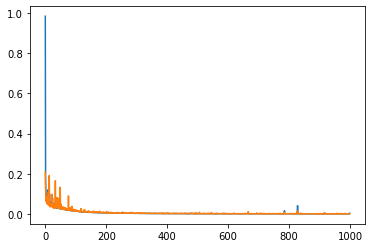

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>MAPE</h3>

In [124]:
pred = model.predict(X_test)

In [125]:
mean_absolute_percentage_error(y_test, pred)

0.19376813471834814

<h3>R2</h3>

In [126]:
r2_score(y_test, pred)

0.9819360436579933

<h3>Cosine Similarity</h3>

In [127]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

[0.99781087]


<h3>Visualization</h3>

In [128]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\rf_linear_reg.csv', index=False)

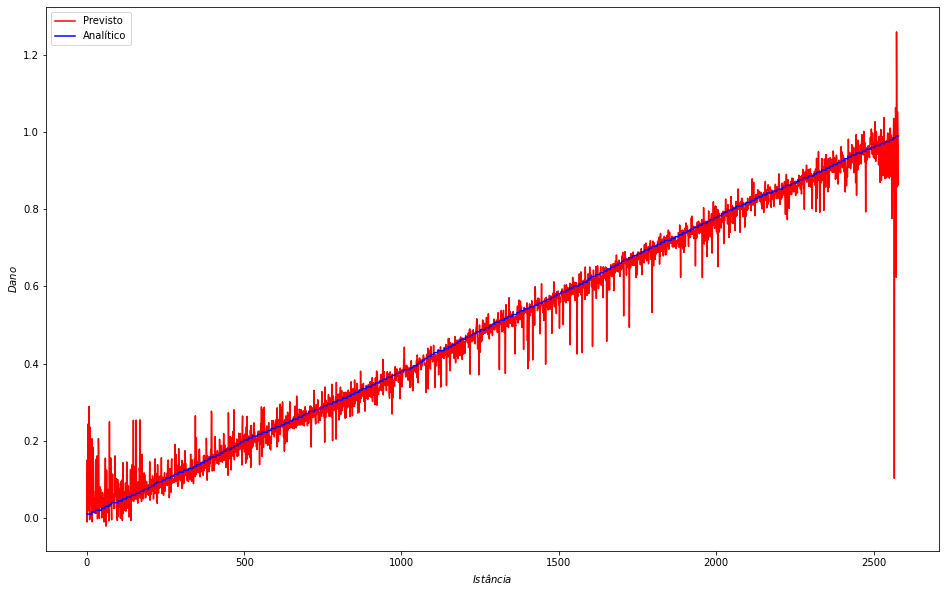

In [129]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()

<h1>Exponential Damage</h1>

In [130]:
df_exp = pd.read_csv('input/results_complete_exponential.csv')

In [131]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['damage'], axis=1), df_exp['damage'], test_size=0.10, random_state=41)

In [132]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [133]:
%%time
path = 'models//exp_reg'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(127)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.summary()
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 80)                10240     
                                                                 
 dense_67 (Dense)            (None, 80)                6480      
                                                                 
 dense_68 (Dense)            (None, 80)                6480      
                                                                 
 dense_69 (Dense)            (None, 1)                 81        
                                                                 
Total params: 23,281
Trainable params: 23,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 1s 1ms/step - loss: 0.3449 - val_loss: 0.2960
Epoch 2/1000
726/726 [==============================] - 1s 925us/step - loss: 0

INFO:tensorflow:Assets written to: models//exp_reg/assets


INFO:tensorflow:Assets written to: models//exp_reg/assets


CPU times: user 18min 47s, sys: 2min 22s, total: 21min 10s
Wall time: 11min 18s


In [134]:
pred = model.predict(X_test)

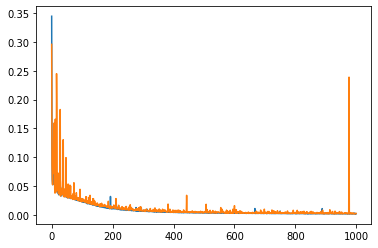

In [135]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>MAPE</h3>

In [136]:
mean_absolute_percentage_error(y_test, pred)

0.12520311783498136

<h3>R2</h3>

In [137]:
r2_score(y_test, pred)

0.9663252063188033

<h3>Cosine Similarity</h3>

In [138]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

[0.99771423]


<h3>Visualization</h3>

In [139]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\rf_linear_reg.csv', index=False)

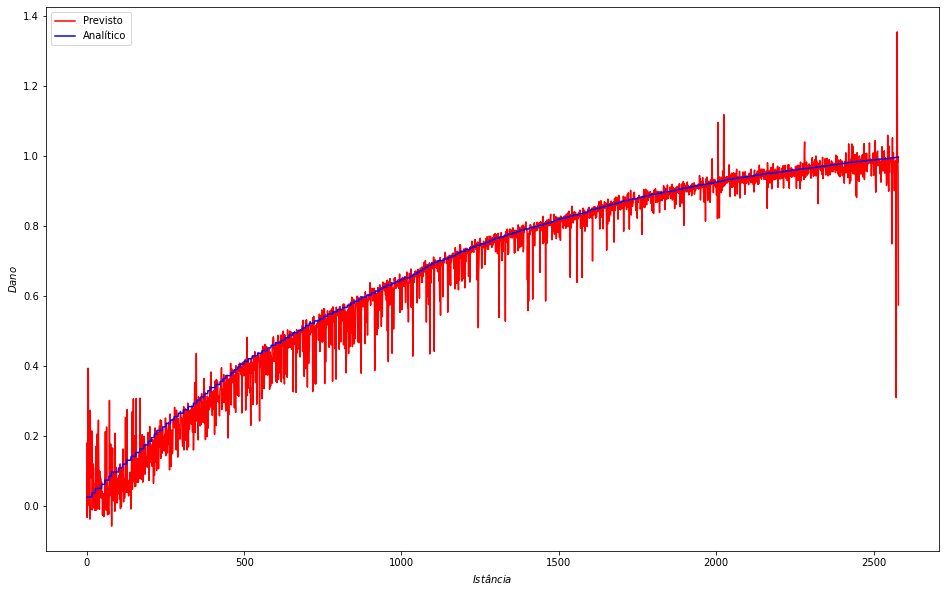

In [140]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()

<h1>Sigmoid-like Damage</h1>

In [142]:
df_sig = pd.read_csv('input/results_complete_sigmoid_like.csv')

In [143]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['damage'], axis=1), df_sig['damage'], test_size=0.10, random_state=41)

In [144]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
%%time
path = 'models/sig_reg'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(127)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.summary()
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 80)                10240     
                                                                 
 dense_71 (Dense)            (None, 80)                6480      
                                                                 
 dense_72 (Dense)            (None, 80)                6480      
                                                                 
 dense_73 (Dense)            (None, 1)                 81        
                                                                 
Total params: 23,281
Trainable params: 23,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 1s 1ms/step - loss: 0.6202 - val_loss: 2.7624
Epoch 2/1000
726/726 [==============================] - 1s 1ms/step - loss: 0.1

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
pred = model.predict(X_test)

<h3>MAPE</h3>

In [ ]:
mean_absolute_percentage_error(y_test, pred)

<h3>R2</h3>

In [ ]:
r2_score(y_test, pred)

<h3>Cosine Similarity</h3>

In [ ]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

<h3>Visualization</h3>

In [ ]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\rf_linear_reg.csv', index=False)

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()